In [1]:
import numpy as np

#Helium parameters would be epsilon = 10.9  K and 
# sigma = 2.64 angstrom (see Hirschfelder et al.)

In [54]:
x0 = np.zeros((2,3))
x0[1,0] = 1.0*2**(1./6.) + .01
v0 = np.zeros((2,3))
m = 1.0
class Potential:
    def __init__(self, sigma, epsilon=1):
        self.sigma=sigma
        self.epsilon=epsilon
    def V(self, x, v):    
        r2 = np.sum((x[1]-x[0])**2)
        return 4*self.epsilon*(self.sigma**12/r2**6 - self.sigma**6/r2**3)
    def F(self, x, v):
        """
        returns -grad V
        """
        r2 = np.sum((x[1]-x[0])**2)
        F=np.zeros((2,3))
        dUdr = 48*self.epsilon*self.sigma**6/r2**3 *(self.sigma**2/r2**3-0.5)/r2
        F[1,:] = (x[1]-x[0])*dUdr
        F[0,:] = -F[1,:]
        return F

    def test(self, x,v, delta=1e-6):
        F = self.F(x,v)
        V0 = self.V(x,v)
        for atom in range(2):
            for d in range(3):
                xn = x.copy()
                xn[atom, d] += delta
                Vn = self.V(xn, v)
                print("F", F[atom,d], "derivative", -(Vn-V0)/delta)

pot = Potential(sigma=1)
for delta in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    print("####", delta)
    pot.test(x0,v0, delta=1e-7)        

#### 0.01
F 0.520706604048091 derivative 0.5207042408361673
F 0.0 derivative -2.220446049250313e-08
F 0.0 derivative -2.220446049250313e-08
F -0.520706604048091 derivative -0.5207089670555831
F -0.0 derivative -2.220446049250313e-08
F -0.0 derivative -2.220446049250313e-08
#### 0.001
F 0.520706604048091 derivative 0.5207042408361673
F 0.0 derivative -2.220446049250313e-08
F 0.0 derivative -2.220446049250313e-08
F -0.520706604048091 derivative -0.5207089670555831
F -0.0 derivative -2.220446049250313e-08
F -0.0 derivative -2.220446049250313e-08
#### 0.0001
F 0.520706604048091 derivative 0.5207042408361673
F 0.0 derivative -2.220446049250313e-08
F 0.0 derivative -2.220446049250313e-08
F -0.520706604048091 derivative -0.5207089670555831
F -0.0 derivative -2.220446049250313e-08
F -0.0 derivative -2.220446049250313e-08
#### 1e-05
F 0.520706604048091 derivative 0.5207042408361673
F 0.0 derivative -2.220446049250313e-08
F 0.0 derivative -2.220446049250313e-08
F -0.520706604048091 derivative -0

In [51]:
def run_calculation(x0, v0, dt = 0.1, nstep = 100):

    xs = np.zeros((nstep,2, 3 ))
    vs = np.zeros((nstep, 2, 3))
    xs[0,:,:] = x0.copy()
    vs[0,:,:] = v0.copy()
    for step in range(nstep-1):
        F = pot.F(xs[step],vs[step])
        xs[step+1]= xs[step]+vs[step]*dt + 0.5*F*dt**2/m
        vs[step+1] = vs[step] + F*dt/m
    return xs, vs



In [52]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'distance (arb)')

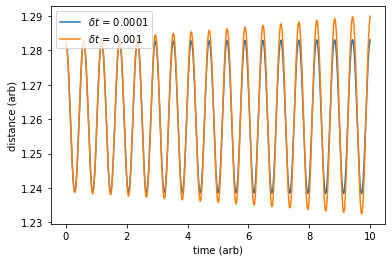

In [58]:
total_time = 10
for tstep in [0.0001, 0.001]:
    nstep = int(total_time/tstep)
    xs, vs = run_calculation(x0,v0, dt = tstep, nstep=nstep)
    r2 = np.sum((xs[:,1,:]-xs[:,0,:])**2, axis=-1)
    plt.plot(np.linspace(0,total_time, nstep), r2, label=f'$\delta t$ = {tstep}')
plt.legend()
plt.xlabel("time (arb)")
plt.ylabel("distance (arb)")